#### This course is based on Julien Mairal course on Kernel Methods for Machine Learning. This notebook corresponds to the first class of the course. You can find the slides in the following link: https://members.cbio.mines-paristech.fr/~jvert/svn/kernelcourse/slides/master2017/master2017.pdf

# Kernels and RKHS

----

## Motivations 

- Develop versatile algorithms to process and analyze data without making any assumptions regarding the type of data (vectors, strings, graphs, images, ...)

## The approach 

- Develop methods based on **pairwise comparisons**
- By imposing constraints on the pairwise comparison function, we obtain a general framework for learning from data (optimization in RKHS).

## Idea

- Define a "comparison function": $K: X \times X \rightarrow R$
- Represent a set of $n$ data points $S = \{x_1, x_2, \dots, x_n\}$ by the $n \times n$ matrix: 
$$[K]_{ij} = K(x_i, x_j) $$

## Remarks

- $K$ is always an $n \times n$ matrix, whatever the nature of data: the same algorithm will work for any type of data (vectors, strings, ...).
- Total **modularity** between the choice of function $K$ and the choice of the algorithm.
- **Poor scalability** with respect to the data size ($n^2$ to compute and store $K$)... but wait until the end of the course to see how to deal with large-scale problems.
- We will restrict ourselves to a **particular class** of pairwise comparision functions.

## Positive Definite (p.d.) Kernels

---

### Definition

A positive definite (p.d) kernel on a set $X$ is a function $K: X \times X \rightarrow \mathbb{R}$ that is symmetric:

$$ K(x, x^{'}) = K(x^{'}, x)$$

and which satisfies, for all $N \in \mathbb{N}$, $(x_1, \dots, x_{N}) \in X^{N}$ and $(a_1, \dots, a_N) \in \mathbb{R}^N$:

$$\sum\limits_{i=1}^N \sum\limits_{j=1}^N a_i a_j K(x_i, x_j) \geq 0 $$

### Remarks

- Equivalently, a kernel $K$ is p.d if and only if, for any $N \in \mathbb{N}$ and any set of points $(x_1, x_2, \dots, x_N) \in X^{N}$, the similarity matrix $[K]_{ij}$ is positive semidefinite.

- Kernel methods are algorithms that take such matrices as inputs.

### Lemma

Let $X = \mathbb{R}$. The function $K: \mathbb{R}^2 \rightarrow \mathbb{R}$ defined by:
$$ \forall (x, x^{'}) \in \mathbb{R}^2, \quad K(x, x^{'}) = xx^{'}$$
id p.d

### Proof

Since $xx^{'} = x^{'}x$, then: 

$$\sum\limits_{i=1}^N \sum\limits_{j=1}^N a_i a_j K(x_i, x_j) = \Big(\sum\limits_{i=1}^N a_i x_i \Big)^2 \geq 0$$ due to the binomial theorem, which proves that $K$ is p.d.


In [32]:
import numpy as np

data = np.random.rand(2) * 10
print("Data: ", data)

def kernel(x, y): 
    return x * y

def compute_matrix(kernel, data):
    n = len(data)
    matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            matrix[i][j] = kernel(data[i], data[j])
    return matrix

kernel_matrix = compute_matrix(kernel, data)
print("Size: ", kernel_matrix.shape)
print(kernel_matrix)

Data:  [5.02332485 6.05559847]
Size:  (2, 2)
[[25.23379254 30.41923828]
 [30.41923828 36.67027286]]


In [29]:
a = np.random.randint(-2, 2, (4))
a

array([ 0, -2,  1, -1])

In [31]:
# Checking if K is a positive definite matrix.
sum = 0
n = len(data)

for i in range(n):
    for j in range(n):
        sum += a[i] * a[j] * kernel_matrix[i][j]
print("Resultado")
print(sum)

Resultado
286.6565510241832


### The simplest p.d kernel, for vectors

### Lemma

Let $X = \mathbb{R}^d$. The function $K: X^2 \rightarrow \mathbb{R}$ defined by: 

$$\forall (x, x^{'}), \quad K(x, x^{'}) = \langle x, x^{'} \rangle_{\mathbb{R}^d} $$

is p.d (it is often callend the **linear kernel**).

#### Note

An inner product is a generalization of the dot product. In a vector space, it is a way to multiply vectors together, with the result of this multiplication being a scalar.

More precisely, for a real vector space, an inner product satisfies the following ofur properties. Let $u, v$ and $w$ be vectors and $\alpha$ be a scalar, then:

1. $\langle u + v, w \rangle = \langle u, w \rangle \langle v, w \rangle$
2. $\langle \alpha v, w \rangle = \alpha \langle v, w \rangle$
3. $\langle v, w \rangle = \langle v, w \rangle$
4. $\langle v, v \rangle \geq 0$ and equal if and only if $v = 0$

### Proof

The proof is similar to the previous one.

### Corollary

Let $X$ be any set, and $\phi: X \rightarrow \mathbb{R}^d$. Then, the function $K: X^2 \rightarrow \mathbb{R}$ defined as follow is p.d: 

$$ \forall(x, x^{'}) \in X^2, \quad K(x, x^{'}) ) = \langle \phi(x), \phi(x^{'}) \rangle_{\mathbb{R}^d}$$

### Example: polynomial kernel

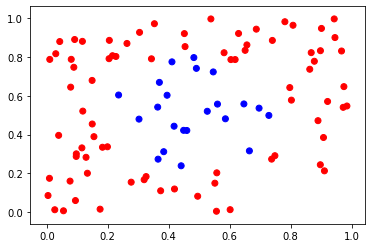

In [60]:
# Generate 2D points.
data = np.random.rand(2, 100)
import matplotlib.pyplot as plt
x = data[0]
y = data[1]

colors = list()
for i in range(len(x)):
    dist = np.linalg.norm(np.array([x[i], y[i]]) - np.array([0.5, 0.5]))
    if dist < 0.3: 
        colors.append("b")
    else: 
        colors.append("r")

plt.scatter(x, y, c = colors)
plt.show()

In [45]:
# Define phi function.
import math
def phi_function(x, y):
    return (x**2, math.sqrt(2) * x * y, y ** 2)

In [52]:
# Generate 3D points.
x3d = list()
y3d = list()
z3d = list()
for i in range(len(x)):
    xi = x[i]
    yi = y[i]
    x3, y3, z3 = phi_function(xi, yi)
    
    x3d.append(x3)
    y3d.append(y3)
    z3d.append(z3)

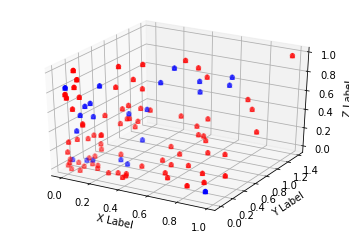

In [63]:
# Plot result.
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # <--- This is important for 3d plotting 
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for m, zlow, zhigh in [('o', -50, -25), ('^', -30, -5)]:
    ax.scatter(x3d, y3d, z3d, marker=m, c = colors)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [70]:
# Computing K.
n = len(data[0])
matrix = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        vector_1 = np.array([x3d[i], y3d[i], z3d[i]])
        vector_2 = np.array([x3d[j], y3d[j], z3d[j]])
        matrix[i][j] = np.dot(vector_1, vector_2)
print("Len: ", len(matrix))
print("Matrix K: ")
matrix

Len:  100
Matrix K: 


array([[0.01253174, 0.00812976, 0.02766219, ..., 0.15146643, 0.02842212,
        0.01735763],
       [0.00812976, 0.00774078, 0.02336875, ..., 0.07650599, 0.00269267,
        0.00226963],
       [0.02766219, 0.02336875, 0.07310627, ..., 0.28391291, 0.02166575,
        0.01531531],
       ...,
       [0.15146643, 0.07650599, 0.28391291, ..., 2.07805399, 0.62016827,
        0.35808638],
       [0.02842212, 0.00269267, 0.02166575, ..., 0.62016827, 0.50718799,
        0.26814168],
       [0.01735763, 0.00226963, 0.01531531, ..., 0.35808638, 0.26814168,
        0.14264168]])

### Lemma

$$K(x, x^{'}) = \langle x, x^{'} \rangle^{d}_{\mathbb{R}_p}$$ is p.d on $X = \mathbb{R}^p$ for any $d \in N$.

## Theorem (Aronznajn, 1950)

$K$ is a p.d kernel on the set $X$ if and only if there exists a Hilbert space $H$ and a mapping

$$\phi: X \rightarrow H $$

such that, for any $x, x^{'}$ in $X$:

$$K(x, x^{'}) = \langle \phi(x), \phi(x^{'}) \rangle_{H} $$
